## Importing Libraries

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd 
import os
import warnings
warnings.filterwarnings('ignore')

## Data Analysis

In [105]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [106]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


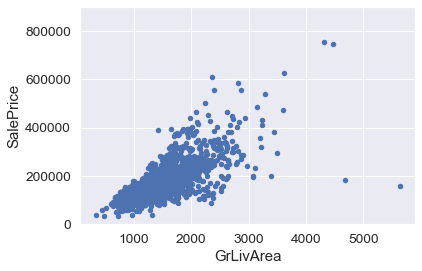

In [107]:
data = pd.concat([train_df['SalePrice'], train_df['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,900000));

Positive correlation between SalePrice and livng area square footage

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


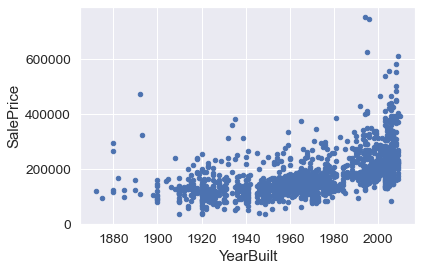

In [108]:
data = pd.concat([train_df['SalePrice'], train_df['YearBuilt']], axis=1)
data.plot.scatter(x='YearBuilt', y='SalePrice');

Exponential like correlation between SalePrice and YearBuilt

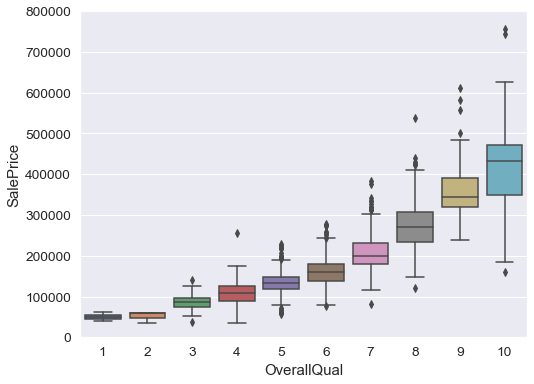

In [109]:
data = pd.concat([train_df['SalePrice'], train_df['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

Positive correlation between SalePrice and OverallQual

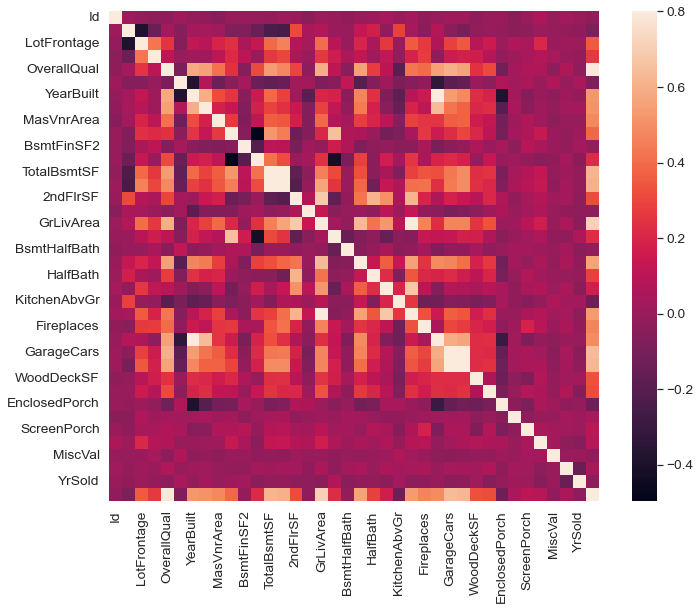

In [110]:
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Corrleation between features

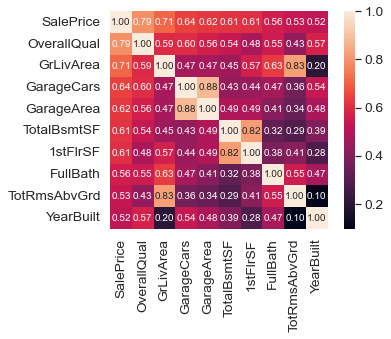

In [111]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Correlation between top 10 most correlated features with respect to SalePrice

## Data Processing

In [112]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [113]:
train_df = train_df.drop((missing_data[missing_data['Total'] > 1]).index,1)
train_df = train_df.drop(train_df.loc[train_df['Electrical'].isnull()].index)
print("Number of missing data in dataframe:", train_df.isnull().sum().max())

Number of missing data in dataframe: 0


Removing features with missing data

In [114]:
train = pd.get_dummies(train_df)

Converting categorical data to numerical data

## Trying Base Models

In [117]:
from sklearn.linear_model import LinearRegression

In [132]:
y = train['SalePrice']
x = train.drop('SalePrice', axis = 1)
x = train.drop('Id', axis = 1)

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [134]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [135]:
n_est_params = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
max_depth_params = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
f_model_acc = [0, 0, 0]

In [136]:
'''for i in n_est_params:
    for j in max_depth_params:
        f_model = RandomForestRegressor(n_estimators=i, max_depth=j)
        f_model.fit(X_train, y_train)
        print(f_model.score(X_test, y_test))
        if f_model.score(X_test, y_test) > f_model_acc[0]:
            f_model_acc[0] = f_model.score(X_test, y_test)
            f_model_acc[1] = i
            f_model_acc[2] = j
'''

'for i in n_est_params:\n    for j in max_depth_params:\n        f_model = RandomForestRegressor(n_estimators=i, max_depth=j)\n        f_model.fit(X_train, y_train)\n        print(f_model.score(X_test, y_test))\n        if f_model.score(X_test, y_test) > f_model_acc[0]:\n            f_model_acc[0] = f_model.score(X_test, y_test)\n            f_model_acc[1] = i\n            f_model_acc[2] = j\n'

In [137]:
#print("Highest acc:", f_model_acc[0], "with n_est:", f_model_acc[1], "and max_depth:", f_model_acc[2])

In [138]:
forest_model = RandomForestRegressor(n_estimators=70, max_depth=10)
forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=70)

In [139]:
n_est_params = [50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]
max_depth_params = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
x_model_acc = [0, 0, 0, 0]

In [140]:
from sklearn.model_selection import cross_val_score, KFold

In [141]:
'''for i in n_est_params:
    for j in max_depth_params:
        for k in learning_rate:
            x_model = XGBRegressor(n_estimators=i, max_depth=j)
            x_model.fit(X_train, y_train)
            kfold = KFold(n_splits=10, shuffle=True)
            kf_cv_scores = cross_val_score(x_model, X_train, y_train, cv=kfold)
            print(kf_cv_scores.mean())
            if kf_cv_scores.mean() > x_model_acc[0]:
                x_model_acc[0] = kf_cv_scores.mean()
                x_model_acc[1] = i
                x_model_acc[2] = j
                x_model_acc[3] = k
'''

'for i in n_est_params:\n    for j in max_depth_params:\n        for k in learning_rate:\n            x_model = XGBRegressor(n_estimators=i, max_depth=j)\n            x_model.fit(X_train, y_train)\n            kfold = KFold(n_splits=10, shuffle=True)\n            kf_cv_scores = cross_val_score(x_model, X_train, y_train, cv=kfold)\n            print(kf_cv_scores.mean())\n            if kf_cv_scores.mean() > x_model_acc[0]:\n                x_model_acc[0] = kf_cv_scores.mean()\n                x_model_acc[1] = i\n                x_model_acc[2] = j\n                x_model_acc[3] = k\n'

In [142]:
#print("Highest acc:", x_model_acc[0], "\nn_est:", x_model_acc[1], "\nmax_depth:", x_model_acc[2], "\nlearning rate:", x_model_acc[3])

In [146]:
xg_model = XGBRegressor(n_estimators=140, max_depth=5, learning_rate=0.2)
xg_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=140, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

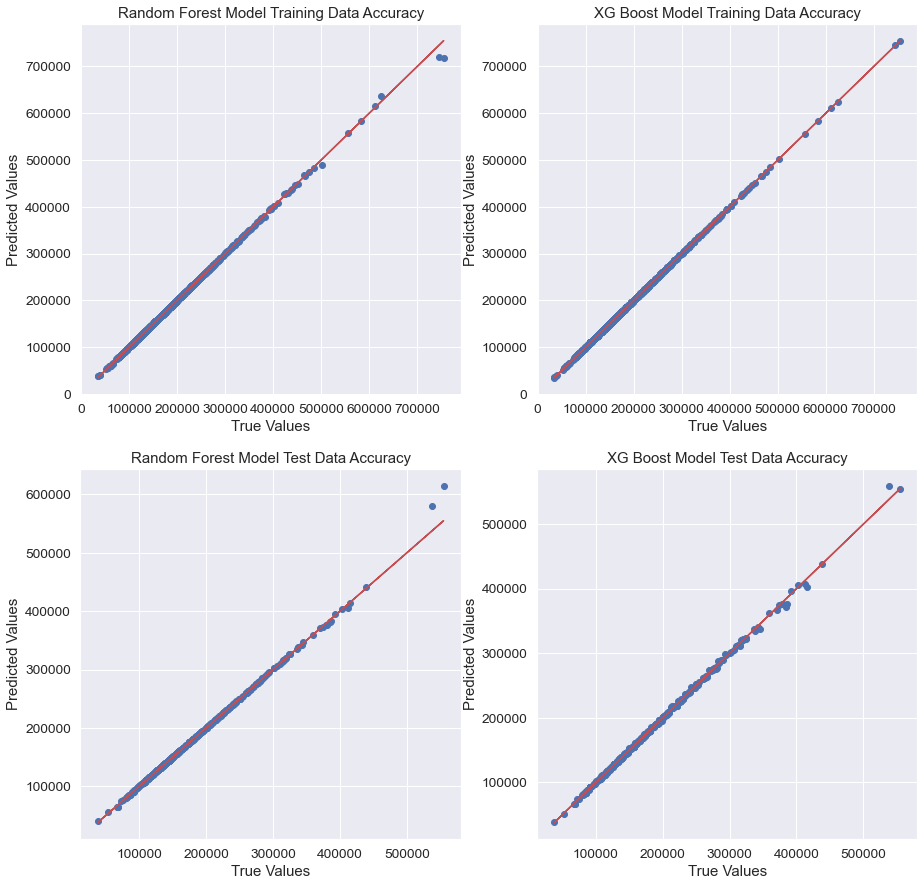

In [147]:
f, ax = plt.subplots(2, 2, figsize=(15,15))
ax[0,0].plot(y_train, y_train, 'r-')
ax[0,0].set(title='Random Forest Model Training Data Accuracy', xlabel='True Values', ylabel='Predicted Values')
ax[0,0].scatter(y_train, forest_model.predict(X_train))

ax[1,0].plot(y_test, y_test, 'r-')
ax[1,0].set(title='Random Forest Model Test Data Accuracy', xlabel='True Values', ylabel='Predicted Values')
ax[1,0].scatter(y_test, forest_model.predict(X_test))

ax[0,1].plot(y_train, y_train, 'r-')
ax[0,1].set(title='XG Boost Model Training Data Accuracy', xlabel='True Values', ylabel='Predicted Values')
ax[0,1].scatter(y_train, xg_model.predict(X_train))

ax[1,1].plot(y_test, y_test, 'r-')
ax[1,1].set(title='XG Boost Model Test Data Accuracy', xlabel='True Values', ylabel='Predicted Values')
ax[1,1].scatter(y_test, xg_model.predict(X_test))